In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly
import seaborn as sns; sns.set()
from matplotlib import dates
import altair as alt
import math

#machine learning imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Imputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [3]:
#read the csv and show the head
jedi_condensed = pd.read_csv('jedi_condensed.csv', low_memory=False)
jedi_condensed

,Event #,GOES Flare Start Time,GOES Flare Peak Time,GOES Flare Class,Pre-Flare Start Time,Pre-Flare End Time,Flare Interrupt,19.5 Depth [%],17.1 Depth [%],30.4 Depth [%],21.1 Depth [%]
0,4.0,2010-05-05 17:13:00.000,2010-05-05 17:19:00.000,M1.2,2010-05-04 23:16:00.000,2010-05-05 07:16:00.000,False,NaN,NaN,0.093239,NaN
1,9.0,2010-06-12 00:30:00.000,2010-06-12 00:57:00.000,M2.0,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.420038,NaN,NaN
2,10.0,2010-06-12 03:57:00.000,2010-06-12 04:06:00.000,C1.0,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.900706,0.054656,NaN
3,11.0,2010-06-12 09:02:00.000,2010-06-12 09:17:00.000,C6.1,2010-06-11 16:57:00.000,2010-06-12 00:57:00.000,True,NaN,0.235694,0.105876,NaN
4,18.0,2010-06-13 10:47:00.000,2010-06-13 10:53:00.000,C1.5,2010-06-12 21:39:00.000,2010-06-13 05:39:00.000,True,NaN,1.243839,0.121056,NaN
5,19.0,2010-06-14 00:44:00.000,2010-06-14 00:51:00.000,C1.5,2010-06-13 16:51:00.000,2010-06-14 00:51:00.000,False,NaN,NaN,0.005830,NaN
6,20.0,2010-07-08 22:03:00.000,2010-07-08 22:16:00.000,C1.2,2010-07-08 14:16:00.000,2010-07-08 22:16:00.000,True,NaN,NaN,0.332573,NaN
7,21.0,2010-07-09 08:53:00.000,2010-07-09 09:01:00.000,C1.8,2010-07-09 01:01:00.000,2010-07-09 09:01:00.000,True,NaN,0.570929,NaN,NaN
8,23.0,2010-07-13 10:43:00.000,2010-07-13 10:51:00.000,C2.6,2010-07-13 02:51:00.000,2010-07-13 10:51:00.000,False,NaN,1.259809,0.679178,NaN
9,24.0,2010-07-14 12:11:00.000,2010-07-14 12:30:00.000,C1.4,2010-07-14 04:30:00.000,2010-07-14 12:30:00.000,True,0.507776,NaN,0.038258,2.042699


In [4]:
#Get only the dimming depth for each wavelength, as we dont want times in our pca
no_times = jedi_condensed.filter(like='Depth')
no_times

,19.5 Depth [%],17.1 Depth [%],30.4 Depth [%],21.1 Depth [%]
0,NaN,NaN,0.093239,NaN
1,NaN,0.420038,NaN,NaN
2,NaN,0.900706,0.054656,NaN
3,NaN,0.235694,0.105876,NaN
4,NaN,1.243839,0.121056,NaN
5,NaN,NaN,0.005830,NaN
6,NaN,NaN,0.332573,NaN
7,NaN,0.570929,NaN,NaN
8,NaN,1.259809,0.679178,NaN
9,0.507776,NaN,0.038258,2.042699


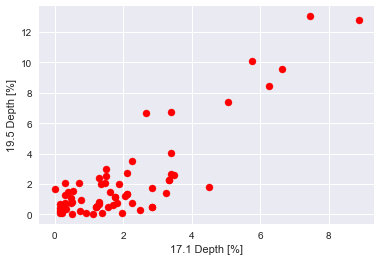

In [21]:
plt.scatter(no_times.filter(regex='17.1'), no_times.filter(regex='19.5'), s=50, color='red')
plt.xlabel('17.1 Depth [%]')
plt.ylabel('19.5 Depth [%]');

In [6]:
x=jedi_condensed.filter(like='Depth')

In [7]:
no_times_condensed = no_times.dropna(thresh=3)
#show events that have three or more wavelengths dimming

In [8]:
no_times_condensed

,19.5 Depth [%],17.1 Depth [%],30.4 Depth [%],21.1 Depth [%]
9,0.507776,NaN,0.038258,2.042699
46,1.759270,NaN,0.346544,2.379428
70,0.371371,NaN,0.116792,0.307266
74,0.204725,0.728771,0.102475,NaN
75,0.110215,1.369006,0.138345,NaN
107,2.033929,0.300815,0.040644,NaN
110,1.064348,0.460758,0.026925,NaN
122,0.043087,0.514704,0.190429,NaN
128,0.258093,NaN,0.518581,0.616431
138,0.234043,0.191703,0.160351,0.442889


In [9]:
jedi_condensed.iloc[877]

Event #                                     3436
GOES Flare Start Time    2013-05-29 02:12:00.000
GOES Flare Peak Time     2013-05-29 02:18:00.000
GOES Flare Class                            C1.5
Pre-Flare Start Time     2013-05-28 18:18:00.000
Pre-Flare End Time       2013-05-29 02:18:00.000
Flare Interrupt                             True
19.5 Depth [%]                          0.633178
17.1 Depth [%]                            1.7118
30.4 Depth [%]                         0.0957935
21.1 Depth [%]                          0.256251
Name: 877, dtype: object

In [10]:
#PCA to reduce the dimensionality of the dataset, trying to see if there is anything that is connecting the wavelengths.
model = PCA(n_components=2)

imp = Imputer(strategy='mean')
#feel in any nan with the mean of the column
jedi_F = imp.fit_transform(no_times)
#normalize the data so scale shouldn't be a factor
jedi_F_N = normalize(jedi_F)

model.fit(jedi_F_N)
jedi_2d = model.transform(jedi_F_N)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



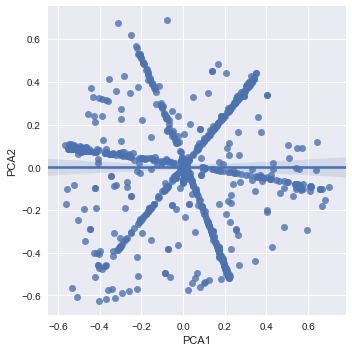

In [11]:
no_times['PCA1'] = jedi_2d[:, 0]
no_times['PCA2'] = jedi_2d[:, 1]
sns.lmplot("PCA1", "PCA2", data=no_times)

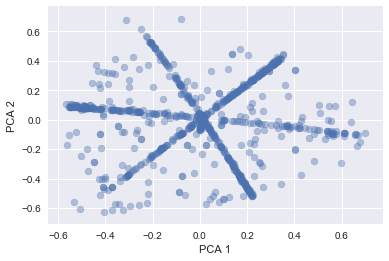

In [12]:
#nothing really to see here, wasnt expecting much
plt.scatter(jedi_2d[:, 0], jedi_2d[:, 1], alpha=0.4)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2");

In [13]:
#try it again with no_times_condensed
model = PCA(n_components=2)

imp = Imputer(strategy='mean')
jedi_F2 = imp.fit_transform(no_times_condensed)

jedi_F_N2 = normalize(jedi_F2)

model.fit(jedi_F_N2)
jedi_2d = model.transform(jedi_F_N2)

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\kelly\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



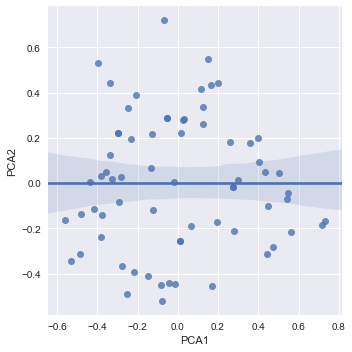

In [14]:
no_times_condensed['PCA1'] = jedi_2d[:, 0]
no_times_condensed['PCA2'] = jedi_2d[:, 1]
sns.lmplot("PCA1", "PCA2", data=no_times_condensed)

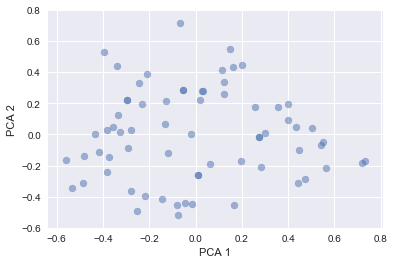

In [15]:
#again, nothing really here.
plt.scatter(jedi_2d[:, 0], jedi_2d[:, 1], alpha=0.5)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2");